In [5]:
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.applications import ResNet50

In [ ]:
def preprocess(batch_images):
    gray_images = tf.image.rgb_to_grayscale(batch_images)
    binary_images = tf.where(gray_images > 127, 255, 0)
    rgb_images = tf.image.grayscale_to_rgb(binary_images)

    return rgb_images

In [44]:
dataset_dir = '/Users/terencemui/Documents/CS228/manuscript/dataset'

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_dir + "/train",
    image_size = (32, 32),
    label_mode='int',
    shuffle=True,
)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_dir + "/test",
    image_size = (32, 32),
    label_mode='int',
    shuffle=True,
)

val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_dir + "/validation",
    image_size = (32, 32),
    label_mode='int',
    shuffle=True,
)

# processed_train_dataset = train_dataset.map(lambda x, y: (preprocess(x), y))
# test_dataset = test_dataset.map(lambda x, y: (preprocess(x), y))
# val_dataset = val_dataset.map(lambda x, y: (preprocess(x), y))
# train_dataset = train_dataset.map(lambda x, y: (tf.keras.applications.resnet50.preprocess_input(x), y))
# test_dataset = test_dataset.map(lambda x, y: (tf.keras.applications.resnet50.preprocess_input(x), y))
# val_dataset = val_dataset.map(lambda x, y: (tf.keras.applications.resnet50.preprocess_input(x), y))

Found 72609 files belonging to 93 classes.
Found 20719 files belonging to 93 classes.
Found 10463 files belonging to 93 classes.


In [ ]:
def label_to_ascii(label):
    if label < 27:
        return label + 100
    elif label < 86:
        return label + 6
    else:
        return label + 7

(32, 32, 3)
& P


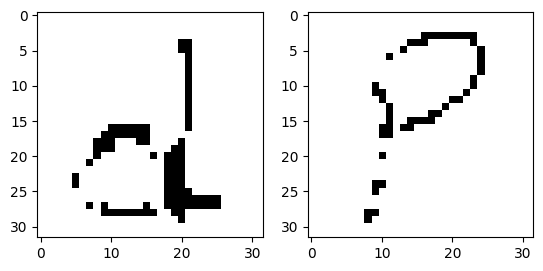

In [22]:
for original, processed in zip(train_dataset.take(1), processed_train_dataset.take(1)):
    plt.subplot(1, 2, 1)
    # plt.imshow(image[0].numpy().astype('uint8'))
    plt.imshow(original[0][0].numpy().astype('uint8'))
    plt.subplot(1, 2, 2)
    print(processed[0][0].shape)
    plt.imshow(processed[0][0], cmap="gray")
    # print(original[1][0], processed[1][0])
    print(chr(label_to_ascii(original[1][0])), chr(label_to_ascii(processed[1][0])))
    # print(chr(label_to_ascii(label[0])), image[0].shape)

In [45]:
# create checkpoints
checkpoint_path = "checkpoint_custom/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=False,
                                                 verbose=1)

base_model = ResNet50(
    include_top=False,
    weights='imagenet',
    input_shape=(32, 32, 3),
)

# Add custom classification layers
x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
x = tf.keras.layers.Dense(93, activation='softmax')(x)  # Your 93 classes
model = tf.keras.models.Model(inputs=base_model.input, outputs=x)

# try:
#     model.load_weights(checkpoint_path)
#     print("loaded weights")
# except:
#     print("weights not found")

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(train_dataset, epochs=10, verbose=1, validation_data=val_dataset, callbacks=[cp_callback], batch_size = 128)

model.save_weights("/Users/terencemui/Documents/CS228/manuscript/weights/")

Epoch 1/10
2270/2270 [==============================] - ETA: 0s - loss: 2.0032 - accuracy: 0.5442
Epoch 1: saving model to checkpoint_custom/cp.ckpt
INFO:tensorflow:Assets written to: checkpoint_custom/cp.ckpt/assets


INFO:tensorflow:Assets written to: checkpoint_custom/cp.ckpt/assets


2270/2270 [==============================] - 111s 48ms/step - loss: 2.0032 - accuracy: 0.5442 - val_loss: 1.8087 - val_accuracy: 0.6276
Epoch 2/10
2270/2270 [==============================] - ETA: 0s - loss: 0.7389 - accuracy: 0.7646
Epoch 2: saving model to checkpoint_custom/cp.ckpt
INFO:tensorflow:Assets written to: checkpoint_custom/cp.ckpt/assets


INFO:tensorflow:Assets written to: checkpoint_custom/cp.ckpt/assets


2270/2270 [==============================] - 107s 47ms/step - loss: 0.7389 - accuracy: 0.7646 - val_loss: 0.7915 - val_accuracy: 0.7592
Epoch 3/10
2270/2270 [==============================] - ETA: 0s - loss: 0.5641 - accuracy: 0.8106
Epoch 3: saving model to checkpoint_custom/cp.ckpt
INFO:tensorflow:Assets written to: checkpoint_custom/cp.ckpt/assets


INFO:tensorflow:Assets written to: checkpoint_custom/cp.ckpt/assets


2270/2270 [==============================] - 109s 48ms/step - loss: 0.5641 - accuracy: 0.8106 - val_loss: 0.6713 - val_accuracy: 0.7780
Epoch 4/10
2270/2270 [==============================] - ETA: 0s - loss: 0.5013 - accuracy: 0.8266
Epoch 4: saving model to checkpoint_custom/cp.ckpt
INFO:tensorflow:Assets written to: checkpoint_custom/cp.ckpt/assets


INFO:tensorflow:Assets written to: checkpoint_custom/cp.ckpt/assets


2270/2270 [==============================] - 110s 48ms/step - loss: 0.5013 - accuracy: 0.8266 - val_loss: 0.5107 - val_accuracy: 0.8280
Epoch 5/10
 828/2270 [=========>....................] - ETA: 1:04 - loss: 0.4672 - accuracy: 0.8345

KeyboardInterrupt: 

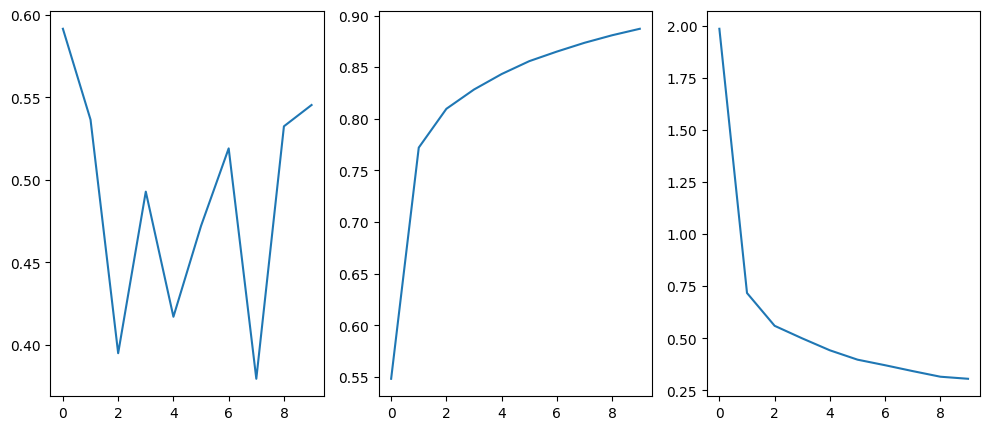

In [41]:
custom_history = history
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.plot(custom_history.history['val_accuracy'])
plt.subplot(1, 3, 2)
plt.plot(custom_history.history['accuracy'])
plt.subplot(1, 3, 3)
plt.plot(custom_history.history['loss'])